In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model

Base = automap_base()



In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()


['measurement', 'station']

In [8]:
# We can view all of the classes that automap found
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Save references to each table


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# data
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [13]:
last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
one_year_ago= dt.date(2017,8,23) - dt.timedelta(days=365)
print (one_year_ago)


2016-08-23


In [14]:
data=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date>= one_year_ago).all()


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df=pd.DataFrame(data)

df.set_index(['date'],inplace=True)
df.sort_values(by='date')
df.head()


,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [16]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


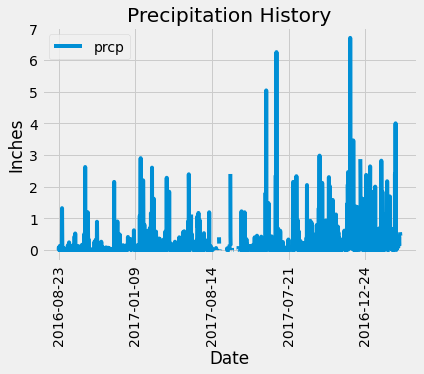

<Figure size 432x288 with 0 Axes>

In [17]:
ax=df.plot(title="Precipitation History", rot=90)
ax.set_xlabel("Date")
ax.set_ylabel('Inches')
# ax.set_xticklabels(df.date,rotation=90)
plt.show()
plt.savefig('RainPlot.png')

In [18]:
# Design a query to show how many stations are available in this dataset?
stations_count=session.query(Station).group_by(Station.station).count()
print(stations_count)

9


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [20]:
data=pd.read_sql("SELECT * FROM measurement", conn)


In [21]:
data.groupby("station").count()



,id,date,prcp,tobs
station,,,,
USC00511918,1979,1979,1932,1979
USC00513117,2709,2709,2696,2709
USC00514830,2202,2202,1937,2202
USC00516128,2612,2612,2484,2612
USC00517948,1372,1372,683,1372
USC00518838,511,511,342,511
USC00519281,2772,2772,2772,2772
USC00519397,2724,2724,2685,2724
USC00519523,2669,2669,2572,2669


In [22]:
# Observation activity list
station_activity=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

for r in station_activity:
    print (r)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [23]:
# 
max_activity=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.max(Measurement.station).desc())
for m in max_activity:
    print (m)

('USC00519523', 2669)
('USC00519397', 2724)
('USC00519281', 2772)
('USC00518838', 511)
('USC00517948', 1372)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00513117', 2709)
('USC00511918', 1979)


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

active_temp=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station== 'USC00519523').all()
active_temp    

[(56.0, 85.0, 74.5436493068565)]

In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_temp=session.query(Measurement.tobs).\
    filter(Measurement.station== 'USC00519523').\
    filter(Measurement.date>=('2017,8,23')).all()
active_temp
active_temp_df=pd.DataFrame(active_temp,columns=["tobs"])
active_temp_df.head()

,tobs
0,74.0
1,73.0
2,73.0
3,71.0
4,74.0


Text(0.5, 0, 'Precipitation')

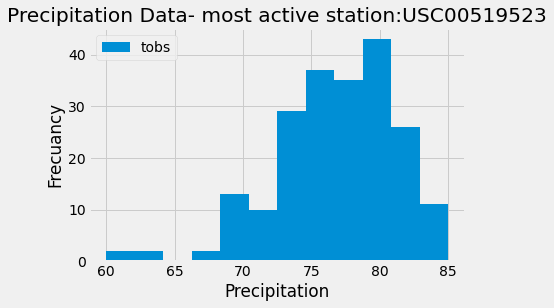

In [29]:
active_temp_df=pd.DataFrame(active_temp,columns=["tobs"])

ax=active_temp_df.plot.hist(bins=12)
ax.set_title("Precipitation Data- most active station:USC00519523")
ax.set_ylabel("Frecuancy")
ax.set_xlabel("Precipitation")

In [27]:
session.close()

## Bonus Challenge Assignment

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
      
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-07-01', '2017-07-30'))

[(69.0, 78.475935828877, 87.0)]


In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temps=calc_temps('2017-07-01', '2017-07-30')
# temps_df=pd.DataFrame(temps)

TypeError: 'float' object is not subscriptable

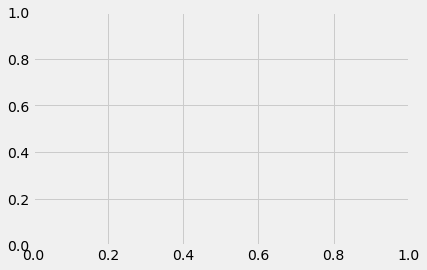

In [43]:
ax = df.plot.bar(rot=0)

title = "Trip Avg Temp"
plt.title(title)
plt.tight_layout()
# plt.savefig(f"{title}.png")
plt.show()

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def temps_vacs(start_data,end_date):
 
    
    data = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    


In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
